In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import random

import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df_1= pd.read_csv('goodoutcome_train.csv')
display(df_1.head())

,Unnamed: 0,name,male,age,delay,BMI,ini_nih,toast,hx_tia,hx_str,hx_pad,hx_chd,hx_ca,Cortex,coro,bgic,thal,mb,Pons,medu,cere,tx_throm,iv_tpa_use,ia_procedure,dtx_plt,dtx_coa,wbc,tc,bun,cr,hb,tg,hct,hdl,fbs,plt,ldl,pt,sbp,dbp,good_outcome_3m,excel_outcome_3m,END,pre_mrs,pre_good_mrs,ant_pos_lesion_both,ant_lesion_only,pos_lesion_only,BINARY_HT,BINARY_DM,BINARY_HL,binary_new_antiplt,binary_new_anticoa,sum_mrs3mo_mrs_3m,binary_sum_mrs3mo_mrs_3m,multiple,ant_circulation,post_circulation,binary_smoking,binary_afib
0,1,brain_mri_CC_0391,0,75,5,22.031726,4,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,6.30,210,11.5,0.7,14.0,88,43.2,52.0,91,24,145.0,0.98,170,100,1,1,0,3,0,0,0,1,1,0,1,1,0,2,1,0,0,1,0,0
1,2,brain_mri_1000900,1,89,7,18.218322,4,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,6.40,88,68.1,4.3,7.8,47,24.8,37.0,70,25,31.0,0.96,122,64,1,1,0,2,1,0,0,1,1,0,0,1,0,2,1,0,0,0,1,0
2,4,brain_mri_1000401,0,83,1,19.834711,15,3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3.50,92,18.2,0.4,10.5,67,27.4,7.0,93,45,32.0,1.04,193,84,1,1,0,3,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1
3,5,brain_mri_CC_1053,1,52,5,25.661152,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2.24,93,13.6,0.6,7.9,76,24.2,37.0,110,50,42.0,1.13,132,68,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0
4,7,brain_mri_CC_1054,1,62,3,25.605536,3,6,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1.50,102,8.5,0.6,7.8,76,22.4,37.0,180,52,42.0,1.22,110,70,0,0,0,1,1,0,1,0,0,0,0,1,0,6,2,0,0,0,0,0


In [4]:
df_2= pd.read_csv('goodoutcome_valid.csv')
display(df_2.head())

,Unnamed: 0,name,male,age,delay,BMI,ini_nih,toast,hx_tia,hx_str,hx_pad,hx_chd,hx_ca,Cortex,coro,bgic,thal,mb,Pons,medu,cere,tx_throm,iv_tpa_use,ia_procedure,dtx_plt,dtx_coa,wbc,tc,bun,cr,hb,tg,hct,hdl,fbs,plt,ldl,pt,sbp,dbp,good_outcome_3m,excel_outcome_3m,END,pre_mrs,pre_good_mrs,ant_pos_lesion_both,ant_lesion_only,pos_lesion_only,BINARY_HT,BINARY_DM,BINARY_HL,binary_new_antiplt,binary_new_anticoa,sum_mrs3mo_mrs_3m,binary_sum_mrs3mo_mrs_3m,multiple,ant_circulation,post_circulation,binary_smoking,binary_afib
0,3,brain_mri_CC_0851,0,67,1,22.265625,5,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,7.79,169,11.2,0.70,15.2,184.0,41.6,46.0,216,36.6,97.0,0.99,140,80,1,0,0,0,1,0,0,1,1,1,0,1,0,3,2,0,1,0,0,0
1,18,brain_mri_2013-4597,1,78,4,22.200001,3,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.90,133,15.5,1.14,9.8,89.0,27.2,35.0,133,77.0,86.0,1.07,120,70,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0
2,20,brain_mri_1000253,1,81,1,22.145329,11,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.00,160,23.8,0.80,14.2,53.0,40.9,49.0,103,78.0,88.0,0.93,144,78,1,1,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,1,0,1
3,30,brain_mri_1000896,0,85,2,34.707761,15,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,5.50,113,9.0,0.40,9.4,119.0,28.5,31.0,147,86.0,66.0,1.08,147,84,0,0,0,1,1,0,1,0,1,0,1,1,0,6,2,0,0,1,0,1
4,33,brain_mri_1000311,1,70,4,25.787243,1,3,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,4.10,111,24.2,0.70,10.7,62.0,33.2,36.0,120,87.0,43.0,1.16,120,70,1,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,1


In [5]:
df_3= pd.read_csv('goodoutcome_test.csv')
display(df_3.head())

,Unnamed: 0,name,male,age,delay,BMI,ini_nih,toast,hx_tia,hx_str,hx_pad,hx_chd,hx_ca,Cortex,coro,bgic,thal,mb,Pons,medu,cere,tx_throm,iv_tpa_use,ia_procedure,dtx_plt,dtx_coa,wbc,tc,bun,cr,hb,tg,hct,hdl,fbs,plt,ldl,pt,sbp,dbp,good_outcome_3m,excel_outcome_3m,END,pre_mrs,pre_good_mrs,ant_pos_lesion_both,ant_lesion_only,pos_lesion_only,BINARY_HT,BINARY_DM,BINARY_HL,binary_new_antiplt,binary_new_anticoa,sum_mrs3mo_mrs_3m,binary_sum_mrs3mo_mrs_3m,multiple,ant_circulation,post_circulation,binary_smoking,binary_afib
0,0,brain_mri_CC_0459,1,56,5,24.772097,1,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,9.18,230,19.7,1.0,16.3,89,47.4,76.0,168,20.9,116.0,1.01,190,100,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0
1,6,brain_mri_CC_0338,1,74,8,25.189545,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4.72,126,51.9,2.3,12.5,103,37.4,38.0,159,52.0,75.0,1.17,140,80,0,0,0,0,1,0,0,1,1,1,1,1,0,2,1,0,0,0,0,0
2,19,brain_mri_1000191,1,79,1,19.921875,7,3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,4.10,152,21.4,1.0,10.5,60,31.3,61.0,111,78.0,67.0,0.99,106,57,1,1,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,0,0,1
3,26,brain_mri_1000241,1,63,7,22.346655,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7.60,181,14.9,0.8,15.9,187,47.0,30.0,161,82.0,130.0,0.97,161,89,1,1,0,0,1,0,1,0,0,1,0,1,0,3,2,0,1,0,1,0
4,27,brain_mri_1000788,1,92,7,20.381570,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3.00,132,25.2,1.0,13.4,55,40.6,39.0,89,83.0,73.0,1.17,138,89,1,1,0,1,1,0,0,1,1,1,0,0,0,4,2,0,0,1,0,0


In [6]:
df_1.columns

Index(['Unnamed: 0', 'name', 'male', 'age', 'delay', 'BMI', 'ini_nih', 'toast',
       'hx_tia', 'hx_str', 'hx_pad', 'hx_chd', 'hx_ca', 'Cortex', 'coro',
       'bgic', 'thal', 'mb', 'Pons', 'medu', 'cere', 'tx_throm', 'iv_tpa_use',
       'ia_procedure', 'dtx_plt', 'dtx_coa', 'wbc', 'tc', 'bun', 'cr', 'hb',
       'tg', 'hct', 'hdl', 'fbs', 'plt', 'ldl', 'pt', 'sbp', 'dbp',
       'good_outcome_3m', 'excel_outcome_3m', 'END', 'pre_mrs', 'pre_good_mrs',
       'ant_pos_lesion_both', 'ant_lesion_only', 'pos_lesion_only',
       'BINARY_HT', 'BINARY_DM', 'BINARY_HL', 'binary_new_antiplt',
       'binary_new_anticoa', 'sum_mrs3mo_mrs_3m', 'binary_sum_mrs3mo_mrs_3m',
       'multiple', 'ant_circulation', 'post_circulation', 'binary_smoking',
       'binary_afib'],
      dtype='object')

In [9]:
select_columns=['ini_nih','hct','bun','fbs','wbc','cr','ldl','pre_good_mrs','age','END','good_outcome_3m'] ##11 features selected from previous feature importance

In [30]:
df_1=df_1[select_columns]
df_2=df_2[select_columns]
df_3=df_3[select_columns]

In [31]:
train_y_1=df_1['good_outcome_3m'] 
val_y_1=df_2['good_outcome_3m'] 
test_y_1=df_3['good_outcome_3m'] 

In [32]:
train_1=df_1.drop(['good_outcome_3m'],axis=1)
val_1=df_2.drop(['good_outcome_3m'],axis=1)
test_1=df_3.drop(['good_outcome_3m'],axis=1)

In [33]:
train_1.shape

(3559, 10)

In [34]:
train_y_1.shape

(3559,)

In [35]:
train_1=pd.concat([train_1,val_1], ignore_index=True)
train_1.shape

(4001, 10)

In [36]:
train_y_1=pd.concat([train_y_1,val_y_1],ignore_index=True)
train_y_1.shape

(4001,)

## Import module

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
X_train=train_1
X_test=test_1
y_train=train_y_1
y_test=test_y_1

##Standardize Input
For neural networks to train properly, we need to standardize the input values.

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Parameters

In [41]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

## Define Custom Dataloaders

In [42]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [43]:
train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))

In [45]:
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [46]:
test_data = TestData(torch.FloatTensor(X_test))

## Initialize Dataloaders

In [47]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1) ## for test loader, bathc size=1

 ## Our Neural Net Architecture
 * Define a 2 layer Feed-Forward network with *BatchNorm* and *Dropout*

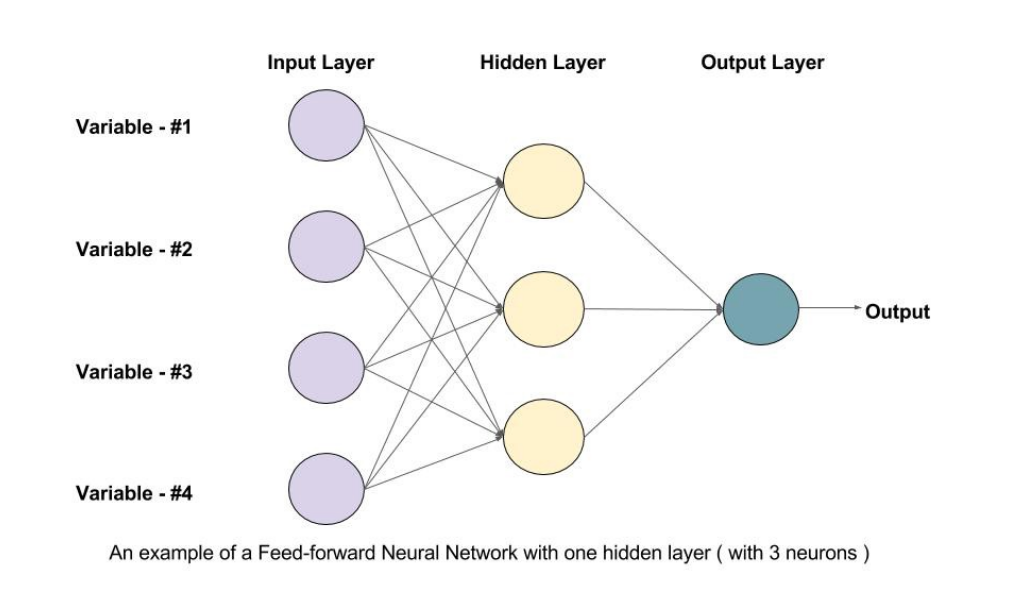

In [48]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 10.
        self.layer_1 = nn.Linear(10, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Initialize our optimizer and decide on which loss function to use.
- Adam for optimizer and BCEWithLogiticsLoss were used

In [50]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=10, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


## Train our model

In [51]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [52]:
model.train()

BinaryClassification(
  (layer_1): Linear(in_features=10, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [64]:
loss_=[] 
n=len(train_loader)
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    loss_.append(epoch_loss/n)
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.26968 | Acc: 88.921
Epoch 002: | Loss: 0.26192 | Acc: 89.571
Epoch 003: | Loss: 0.26202 | Acc: 89.206
Epoch 004: | Loss: 0.26036 | Acc: 89.159
Epoch 005: | Loss: 0.26057 | Acc: 89.667
Epoch 006: | Loss: 0.24944 | Acc: 90.317
Epoch 007: | Loss: 0.25812 | Acc: 89.333
Epoch 008: | Loss: 0.25531 | Acc: 89.016
Epoch 009: | Loss: 0.25011 | Acc: 89.810
Epoch 010: | Loss: 0.24702 | Acc: 90.175
Epoch 011: | Loss: 0.24624 | Acc: 90.159
Epoch 012: | Loss: 0.24025 | Acc: 90.143
Epoch 013: | Loss: 0.23440 | Acc: 90.365
Epoch 014: | Loss: 0.23169 | Acc: 90.762
Epoch 015: | Loss: 0.22507 | Acc: 91.032
Epoch 016: | Loss: 0.22516 | Acc: 91.286
Epoch 017: | Loss: 0.22654 | Acc: 91.143
Epoch 018: | Loss: 0.23190 | Acc: 90.841
Epoch 019: | Loss: 0.23157 | Acc: 90.460
Epoch 020: | Loss: 0.22834 | Acc: 90.905
Epoch 021: | Loss: 0.21541 | Acc: 91.349
Epoch 022: | Loss: 0.21359 | Acc: 91.762
Epoch 023: | Loss: 0.21572 | Acc: 91.714
Epoch 024: | Loss: 0.21073 | Acc: 91.794
Epoch 025: | Los

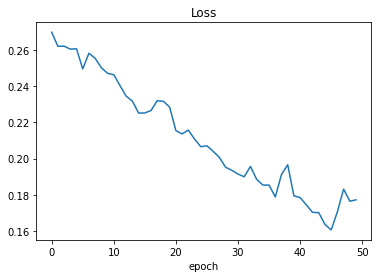

In [66]:
plt.plot(loss_)
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

## Test the model

In [54]:
y_pred_list = []
model.eval()

BinaryClassification(
  (layer_1): Linear(in_features=10, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [55]:
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

In [56]:
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

## Confusion Matrix

In [57]:
confusion_matrix(y_test, y_pred_list)

array([[ 72,  76],
       [ 47, 249]])

## Classification Report

In [58]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54       148
           1       0.77      0.84      0.80       296

    accuracy                           0.72       444
   macro avg       0.69      0.66      0.67       444
weighted avg       0.71      0.72      0.71       444



## References
https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89